In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Generate a complex hypervector with random angles.
def generate_hypervector(dim):
    angles = np.random.uniform(0, 2 * np.pi, dim)
    return np.exp(1j * angles)  # e^(iθ)

# Binding and Bundling Operations
def bind(hv1, hv2):
    return hv1 * hv2

def bundle(*hvs):
    sum_hv = sum(hvs)
    return sum_hv / np.abs(sum_hv)  # Normalize to keep on unit circle

# Similarity Computation
def similarity(hv1, hv2):
    return np.real(np.dot(hv1.conj(), hv2)) / len(hv1)

# Fractional Power Encoding
def fractional_power(hv, alpha):
    return np.exp(1j * alpha * np.angle(hv))

# Generate the encoding codebook
def gen_basis(dim, num_features,distribution="gaussian", covariance=None):
    """
    Args:
        dim (int): Dimension of the hypervector.
        num_features (int): Number of features to encode.
        distribution (str): Distribution type 'gaussian' or 'uniform'.
        covariance (np.ndarray): Covariance matrix for Gaussian distribution.
    """
    if distribution == "gaussian":
        if covariance is None:
            covariance = np.eye(F)  # Default to identity covariance
        W = np.random.multivariate_normal(np.zeros(F), covariance, D).T  # Shape (F, D)  
    elif distribution == "uniform":
        W = np.random.uniform(0, 2 * np.pi, (F, D))  # Shape (F, D)
    else:
        raise ValueError("Unsupported distribution type. Use 'gaussian' or 'uniform'.")
    return W

# Encode feature in FHRR
def encode_feature(codebook, features):
    # Convert feature vector to the same shape as codebook
    feature_vector = np.expand_dims(features, axis=-1)  # Shape (N, F, 1)
    
    phase_shift = feature_vector * codebook  # Shape (N, F, D)
    
    # Sum over feature dimensions and exponentiate
    encoded_hv = np.exp(1j * np.sum(phase_shift, axis=1))  # Shape (N, D)
    
    return encoded_hv

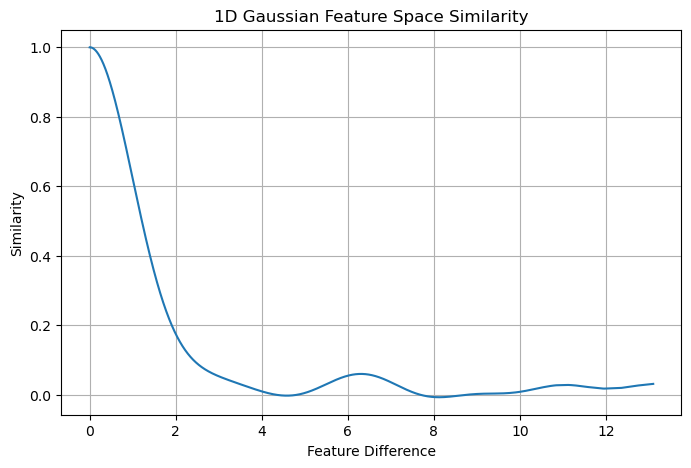

In [62]:
# Kernel Behavior for low-dimensional features

# (a) A 1-dimensional feature space with Gaussian N(0,a) for some a.
D = 1000
F = 1
a=4
# Generate a Gaussian codebook
codebook = gen_basis(D, F, distribution="gaussian")
# Generate a feature vector
features = np.random.normal(0, np.sqrt(a), (500, F))
# Encode the feature vector
encoded_hv = encode_feature(codebook, features)

# Compute the similarity
similarity_matrix = np.zeros((features.shape[0], features.shape[0]))
for i in range(features.shape[0]):
    for j in range(features.shape[0]):
        similarity_matrix[i, j] = similarity(encoded_hv[i], encoded_hv[j])
        feature_diffs[i, j] = np.abs(features[i, 0] - features[j, 0])

# Flatten and sort based on feature differences
sorted_indices = np.argsort(feature_diffs.flatten())
sorted_feature_diffs = feature_diffs.flatten()[sorted_indices]
sorted_similarity_values = similarity_matrix.flatten()[sorted_indices]
# Plot the similarity matrix
plt.figure(figsize=(8, 5))
plt.plot(sorted_feature_diffs, sorted_similarity_values, label="FHRR Similarity")
plt.xlabel("Feature Difference")
plt.ylabel("Similarity")
plt.title("1D Gaussian Feature Space Similarity")
plt.grid()
plt.show()



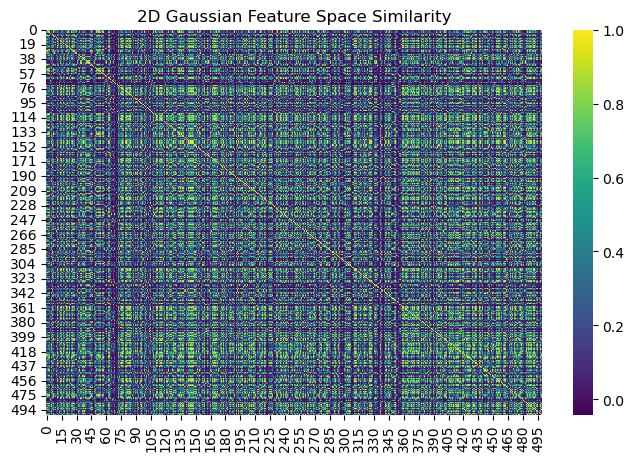

In [68]:
# A 2-dimensional feature space with multivariate Gaussian N(0,diag(b,b)).
D = 1000
F = 2
b= 1
covariance = np.diag([b, b])  # Diagonal covariance matrix
# Generate a multivariate Gaussian codebook
codebook = gen_basis(D, F, distribution="gaussian")
# Generate a feature vector
features = np.random.multivariate_normal(np.zeros(F), covariance, 500)  # Shape (N, F)
# Encode the feature vector
encoded_hv = encode_feature(codebook, features)
# Compute the similarity
similarity_matrix = np.zeros((features.shape[0], features.shape[0]))
for i in range(features.shape[0]):
    for j in range(features.shape[0]):
        similarity_matrix[i, j] = similarity(encoded_hv[i], encoded_hv[j])
# Plot the similarity matrix
plt.figure(figsize=(8, 5))
sns.heatmap(similarity_matrix, cmap="viridis", cbar=True)
plt.title("2D Gaussian Feature Space Similarity")
plt.show()

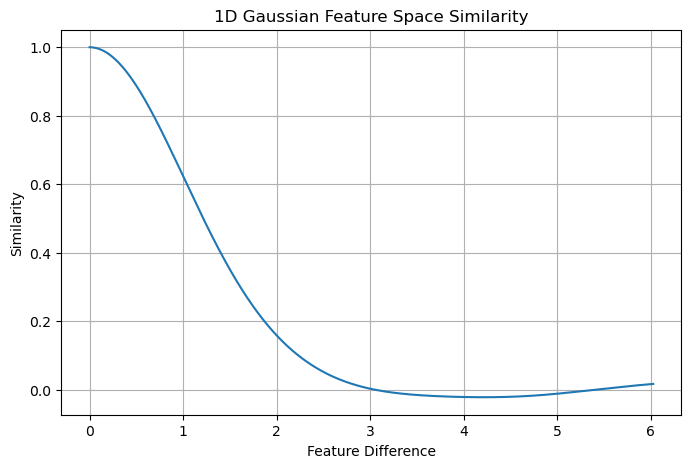

In [64]:
# (c) Two 1-dimensional feature spaces with Gaussian N(0,b) for the same b.
D = 1000
F = 1
# Generate a Gaussian codebook
codebook = gen_basis(D, F, distribution="gaussian")
# Generate two feature vectors (b=1)
features1 = np.random.normal(0, np.sqrt(1), (500, F))
features2 = np.random.normal(0, np.sqrt(1), (500, F))
# Encode the feature vectors
encoded_hv1 = encode_feature(codebook, features1)
encoded_hv2 = encode_feature(codebook, features2)
# Compute the similarity
similarity_matrix = np.zeros((features1.shape[0], features2.shape[0]))
feature_diffs = np.zeros((features1.shape[0], features2.shape[0]))
for i in range(features1.shape[0]):
    for j in range(features2.shape[0]):
        feature_diffs[i, j] = np.abs((features1[i] - features2[j]).item())
        similarity_matrix[i, j] = similarity(encoded_hv1[i], encoded_hv2[j])

# Flatten feature differences and similarity matrix
sorted_indices = np.argsort(feature_diffs.flatten())  # Get sorting order
sorted_feature_diffs = feature_diffs.flatten()[sorted_indices]
sorted_similarity_values = similarity_matrix.flatten()[sorted_indices]


# Plot the similarity vs. feature difference
plt.figure(figsize=(8, 5))
plt.plot(sorted_feature_diffs, sorted_similarity_values, label="FHRR Similarity")
plt.xlabel("Feature Difference")
plt.ylabel("Similarity")
plt.title("1D Gaussian Feature Space Similarity")
plt.grid()
plt.show()

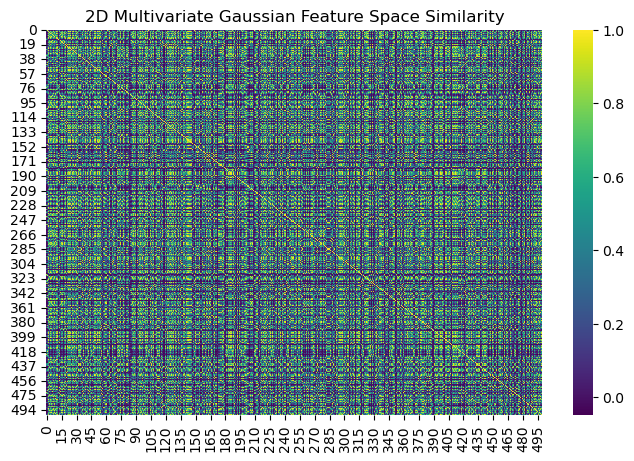

In [65]:
# (d) A 2-dimensional feature space with a multivariate Gaussian N(0,Σ) for some non-diagonal Σ.
D = 1000
F = 2   

# Define a non-diagonal covariance matrix
covariance = np.array([[1, 0.5], [0.5, 1]])
# Generate a multivariate Gaussian codebook
codebook = gen_basis(D, F, distribution="gaussian")
# Generate a feature vector
features = np.random.multivariate_normal(np.zeros(F), covariance, 500)
# Encode the feature vector
encoded_hv = encode_feature(codebook, features)
# Compute the similarity
similarity_matrix = np.zeros((features.shape[0], features.shape[0]))
for i in range(features.shape[0]):
    for j in range(features.shape[0]):
        similarity_matrix[i, j] = similarity(encoded_hv[i], encoded_hv[j])
# Plot the similarity matrix
plt.figure(figsize=(8, 5))
sns.heatmap(similarity_matrix, cmap="viridis", cbar=True)
plt.title("2D Multivariate Gaussian Feature Space Similarity")
plt.show()

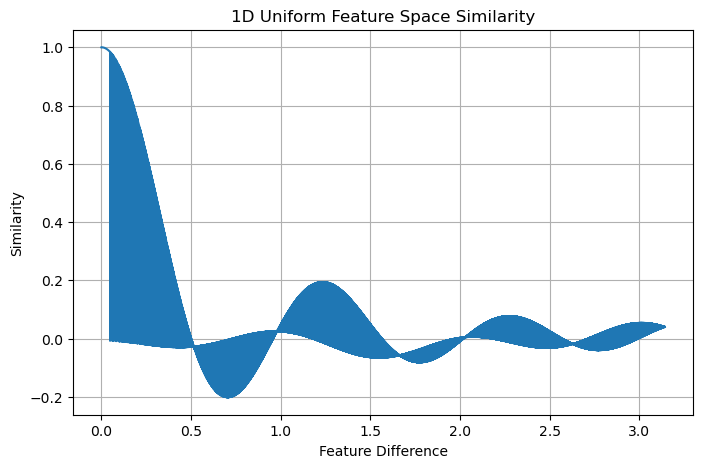

In [61]:
# (e) A 1-dimensional feature space with uniform distribution Unif[0,2π).
D = 1000
F = 1
# Generate a uniform codebook
codebook = gen_basis(D, F, distribution="uniform")
# Generate a feature vector
features = np.random.uniform(0, 2 * np.pi, (500, F))
# Encode the feature vector
encoded_hv = encode_feature(codebook, features)
# Compute the similarity
similarity_matrix = np.zeros((features.shape[0], features.shape[0]))
feature_diffs = np.zeros((features.shape[0], features.shape[0]))
for i in range(features.shape[0]):
    for j in range(features.shape[0]):
        feature_diffs[i, j] = np.minimum(np.abs(features[i, 0] - features[j, 0]), 2 * np.pi - np.abs(features[i, 0] - features[j, 0]))
        similarity_matrix[i, j] = similarity(encoded_hv[i], encoded_hv[j])

# Flatten for sorting and plotting
sorted_indices = np.argsort(feature_diffs.flatten())  # Get sorting order
sorted_feature_diffs = feature_diffs.flatten()[sorted_indices]
sorted_similarity_values = similarity_matrix.flatten()[sorted_indices]

# Plot similarity vs. feature difference
plt.figure(figsize=(8, 5))
plt.plot(sorted_feature_diffs, sorted_similarity_values, label="FHRR Similarity")
plt.xlabel("Feature Difference")
plt.ylabel("Similarity")
plt.title("1D Uniform Feature Space Similarity")
plt.grid()
plt.show()

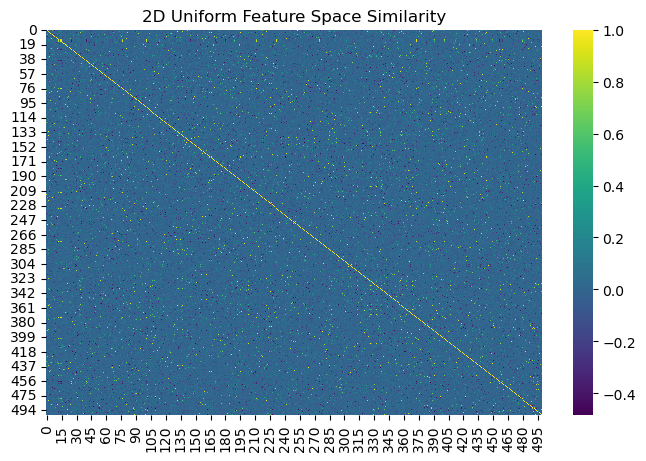

In [67]:
# (f) A 2-dimensional feature space with uniform distribution Unif[0,2π)2
D = 1000
F = 2
# Generate a uniform codebook
codebook = gen_basis(D, F, distribution="uniform")
# Generate a feature vector
features = np.random.uniform(0, 2 * np.pi, (500, F))
# Encode the feature vector
encoded_hv = encode_feature(codebook, features)
# Compute the similarity
similarity_matrix = np.zeros((features.shape[0], features.shape[0]))
for i in range(features.shape[0]):
    for j in range(features.shape[0]):
        similarity_matrix[i, j] = similarity(encoded_hv[i], encoded_hv[j])
# Plot the similarity matrix
plt.figure(figsize=(8, 5))
sns.heatmap(similarity_matrix, cmap="viridis", cbar=True)
plt.title("2D Uniform Feature Space Similarity")
plt.show()